In [127]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
import pandas_datareader as data

In [128]:
start = '2010-01-01'
end   = date.today().strftime("%Y-%m-%d")

# df = data.DataReader('AAPL',data_source='yahoo',start=start,end=end)
df = yf.download('BHARTIARTL.NS',start=start,end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,302.861145,304.927032,297.352051,298.591614,280.579376,3215431
2010-01-05,301.392059,304.835205,298.867065,303.320221,285.022675,4685390
2010-01-06,305.707489,307.727478,299.417969,300.106598,282.002991,4802900
2010-01-07,301.483856,306.671570,301.162506,302.447968,284.203125,4213709
2010-01-08,302.769318,304.330231,298.086609,298.453888,280.449982,2892365


In [129]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-19,776.000000,776.500000,765.650024,772.000000,772.000000,4169463
2023-01-20,775.849976,775.849976,758.299988,764.450012,764.450012,6289718
2023-01-23,767.900024,776.000000,763.849976,772.700012,772.700012,2685320
2023-01-24,773.000000,777.549988,761.000000,775.650024,775.650024,5012125
2023-01-25,774.950012,780.500000,768.000000,776.500000,776.500000,6560514


In [130]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,302.861145,304.927032,297.352051,298.591614,280.579376,3215431
1,2010-01-05,301.392059,304.835205,298.867065,303.320221,285.022675,4685390
2,2010-01-06,305.707489,307.727478,299.417969,300.106598,282.002991,4802900
3,2010-01-07,301.483856,306.671570,301.162506,302.447968,284.203125,4213709
4,2010-01-08,302.769318,304.330231,298.086609,298.453888,280.449982,2892365


In [131]:
df = df.drop(['Adj Close'],axis=1)

In [132]:
df

,Date,Open,High,Low,Close,Volume
0,2010-01-04,302.861145,304.927032,297.352051,298.591614,3215431
1,2010-01-05,301.392059,304.835205,298.867065,303.320221,4685390
2,2010-01-06,305.707489,307.727478,299.417969,300.106598,4802900
3,2010-01-07,301.483856,306.671570,301.162506,302.447968,4213709
4,2010-01-08,302.769318,304.330231,298.086609,298.453888,2892365
...,...,...,...,...,...,...
3222,2023-01-19,776.000000,776.500000,765.650024,772.000000,4169463
3223,2023-01-20,775.849976,775.849976,758.299988,764.450012,6289718
3224,2023-01-23,767.900024,776.000000,763.849976,772.700012,2685320
3225,2023-01-24,773.000000,777.549988,761.000000,775.650024,5012125


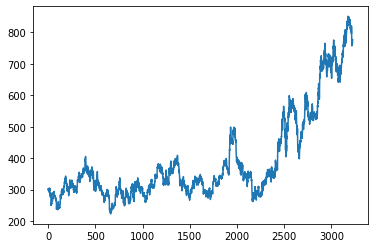

In [133]:
plt.plot(df.Close)

In [134]:
df

,Date,Open,High,Low,Close,Volume
0,2010-01-04,302.861145,304.927032,297.352051,298.591614,3215431
1,2010-01-05,301.392059,304.835205,298.867065,303.320221,4685390
2,2010-01-06,305.707489,307.727478,299.417969,300.106598,4802900
3,2010-01-07,301.483856,306.671570,301.162506,302.447968,4213709
4,2010-01-08,302.769318,304.330231,298.086609,298.453888,2892365
...,...,...,...,...,...,...
3222,2023-01-19,776.000000,776.500000,765.650024,772.000000,4169463
3223,2023-01-20,775.849976,775.849976,758.299988,764.450012,6289718
3224,2023-01-23,767.900024,776.000000,763.849976,772.700012,2685320
3225,2023-01-24,773.000000,777.549988,761.000000,775.650024,5012125


In [135]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3222    801.515998
3223    801.954498
3224    802.415499
3225    802.821499
3226    803.236499
Name: Close, Length: 3227, dtype: float64

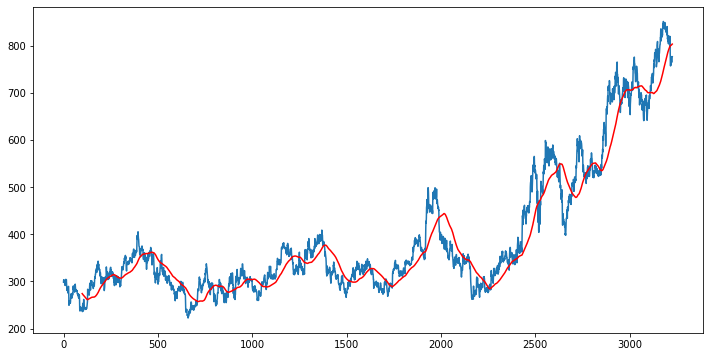

In [136]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [137]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3222    750.79575
3223    750.77900
3224    750.80950
3225    750.80950
3226    750.88000
Name: Close, Length: 3227, dtype: float64

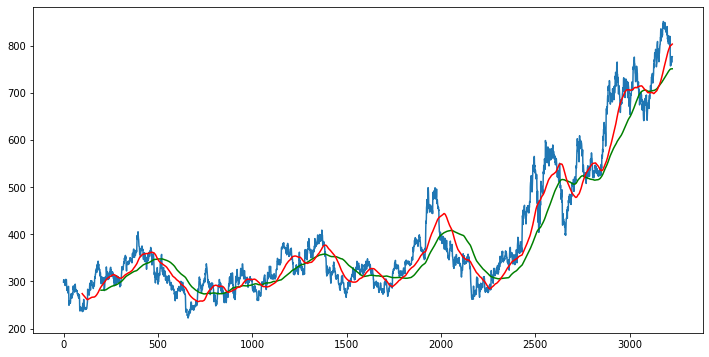

In [138]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

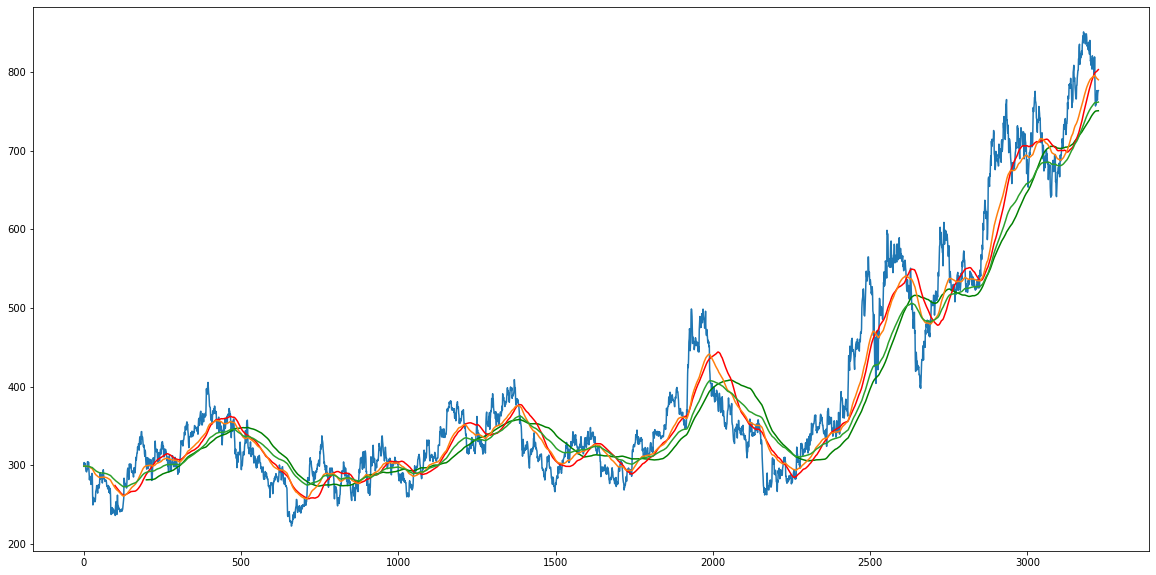

In [139]:
EMA100 = df['Close'].ewm(span=100, adjust=False).mean()
EMA200= df['Close'].ewm(span=200, adjust=False).mean()

plt.figure(figsize=(20,10))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')
plt.plot(EMA100,)
plt.plot(EMA200)

In [140]:
df.shape

(3227, 6)

In [141]:
data_trainig = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_trainig.shape,data_testing.shape)

(2258, 1) (969, 1)


In [142]:
data_trainig.head()

,Close
0,298.591614
1,303.320221
2,300.106598
3,302.447968
4,298.453888


In [143]:
data_testing.head()

,Close
2258,289.639374
2259,293.954803
2260,292.026642
2261,282.477570
2262,282.661224


In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [145]:
data_trainig_array = scaler.fit_transform(data_trainig)
data_trainig_array

array([[0.27550683],
       [0.29262211],
       [0.28099034],
       ...,
       [0.22465938],
       [0.23778665],
       [0.24908605]])

In [146]:
x_train = []
y_train = []
x_val = []
y_val =[] 

for i in range(100,data_trainig_array.shape[0]) :
    
    x_train.append(data_trainig_array[i-100 : i])
    y_train.append(data_trainig_array[i,0])
    

x_train , y_train = np.array(x_train) , np.array(y_train)


In [147]:
x_train.shape
# y_train.shape

(2158, 100, 1)

### ML MODEL

In [148]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential , load_model

In [149]:
model = Sequential()


model.add(LSTM(units=50,activation='relu',
            return_sequences=True,
            input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',
            return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=60,activation='relu',
            return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',
            return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',
            return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [150]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           29040     
                                                                 
 dropout_2 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           4

In [151]:
model.compile(optimizer='adam',
            loss='mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
68/68 [==============================] - 21s 249ms/step - loss: 0.0283
Epoch 2/50
68/68 [==============================] - 17s 248ms/step - loss: 0.0120
Epoch 3/50
68/68 [==============================] - 17s 253ms/step - loss: 0.0100
Epoch 4/50
68/68 [==============================] - 20s 300ms/step - loss: 0.0096
Epoch 5/50
68/68 [==============================] - 20s 288ms/step - loss: 0.0089
Epoch 6/50
68/68 [==============================] - 22s 320ms/step - loss: 0.0088
Epoch 7/50
68/68 [==============================] - 34s 496ms/step - loss: 0.0069
Epoch 8/50
68/68 [==============================] - 43s 627ms/step - loss: 0.0067
Epoch 9/50
68/68 [==============================] - 20s 282ms/step - loss: 0.0063
Epoch 10/50
68/68 [==============================] - 20s 294ms/step - loss: 0.0063
Epoch 11/50
68/68 [==============================] - 20s 299ms/step - loss: 0.0055
Epoch 12/50
68/68 [==============================] - 22s 319ms/step - loss: 0.0052
Epoch 13/50
6

<AxesSubplot:>

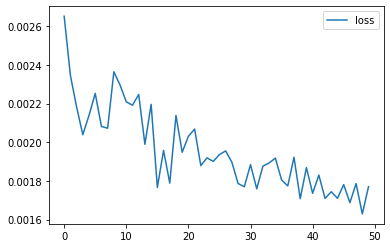

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
model.save('keras_stock_new.h5')

In [ ]:
data_testing.head()

,Close
2258,289.639374
2259,293.954803
2260,292.026642
2261,282.477570
2262,282.661224


In [ ]:
past100 = data_trainig.tail(100)
past100

,Close
2158,300.014771
2159,292.393890
2160,284.773010
2161,274.168060
2162,271.046265
...,...
2253,278.850769
2254,283.717102
2255,284.543488
2256,288.170288


In [ ]:
data_testing

,Close
2258,289.639374
2259,293.954803
2260,292.026642
2261,282.477570
2262,282.661224
...,...
3222,772.000000
3223,764.450012
3224,772.700012
3225,775.650024


In [ ]:
final_df = past100.append(data_testing,ignore_index=True)

C:\Users\RITWIK SRIVASTAVA\AppData\Local\Temp\ipykernel_16372\1868875912.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past100.append(data_testing,ignore_index=True)


In [ ]:
final_df.shape

(1069, 1)

In [ ]:
final_df

,Close
0,300.014771
1,292.393890
2,284.773010
3,274.168060
4,271.046265
...,...
1064,772.000000
1065,764.450012
1066,772.700012
1067,775.650024


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(1069, 1)

In [ ]:
input_data.shape

(1069, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]) :
    
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i,0])
    
x_test , y_test = np.array(x_test) , np.array(y_test)

In [ ]:
x_test.shape

(969, 100, 1)

In [ ]:
y_test.shape

(969,)

In [ ]:
model = load_model('keras_stock1.h5')
y_predicted = model.predict(x_test)

31/31 [==============================] - 2s 49ms/step


In [ ]:
real_data = df.Close
real_data = pd.DataFrame(real_data)
print(real_data.shape)
real_data


(3227, 1)


,Close
0,298.591614
1,303.320221
2,300.106598
3,302.447968
4,298.453888
...,...
3222,772.000000
3223,764.450012
3224,772.700012
3225,775.650024


In [ ]:
real_data1 = scaler.fit_transform(real_data)
real_data1.shape

(3227, 1)

In [ ]:
real_data_1 = []

for i in range(100 , real_data1.shape[0]) :
    real_data_1.append(real_data1[i-100 : i])
    
real_data_1 = np.array(real_data_1)
real_data_1.shape

(3127, 100, 1)

In [ ]:
preedicted_data = model.predict(real_data_1)

98/98 [==============================] - 5s 51ms/step


In [ ]:
real_data = pd.DataFrame(real_data)
real_data

,Close
0,298.591614
1,303.320221
2,300.106598
3,302.447968
4,298.453888
...,...
3222,772.000000
3223,764.450012
3224,772.700012
3225,775.650024


In [ ]:
y_predicted[967]

array([0.8365791], dtype=float32)

In [ ]:
y_test.shape

(969,)

In [ ]:
scaler.scale_[0]

0.001590519517367997

In [ ]:
scale_factor = 1/0.001590519517367997
y_predicted = y_predicted * scale_factor
preedicted_data = preedicted_data * scale_factor
y_test = y_test * scale_factor

In [ ]:
preedicted_data

array([[ 65.16423],
       [ 64.07058],
       [ 65.89928],
       ...,
       [527.0144 ],
       [530.677  ],
       [534.726  ]], dtype=float32)

In [ ]:
y_predicted.shape

(969, 1)

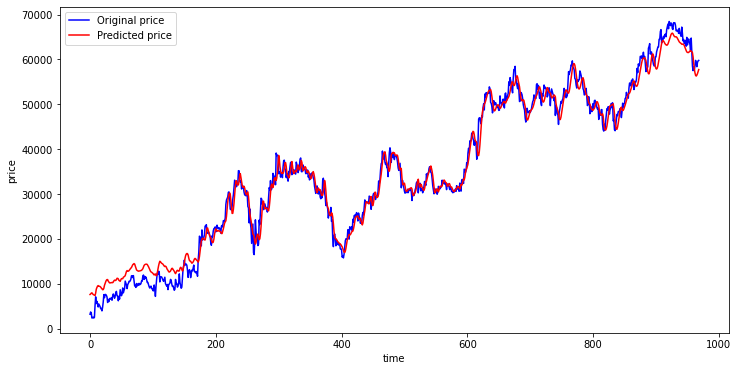

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original price')
plt.plot(y_predicted,'r',label = 'Predicted price')

plt.xlabel('time')
plt.ylabel('price')

plt.legend()

plt.show()